<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/Bootcamp_DataScience_projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/img/Banner_Bootcamp.png?raw=true">

#Projeto Final de Conclusão de Curso
###Bootcamp Data Science Aplicada 2 by [Alura](https://www.alura.com.br/) 
####Autor: Helton Cordeiro
e-mail: heltoncordeiro@gmail.com

Junho-Agosto/2021.



---

# **Objetivo desse notebook**

Após os dados disponibilizados pelo Hospital Sírio Libânes ter sido tratados em [notebook próprio](https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/projeto_final_tratamento_dados.ipynb) vamos começar a trabalhar com os Modelos de Machine Learning com o seguinte objetivo:


#### **Prever** quais pacientes precisarão ser admitidos(as) na UTI e com isso **definir** qual a necessidade de leitos de UTI do hospital, a partir dos dados clínicos individuais disponíveis.

---

##Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.simplefilter(action='ignore')

import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

## Importando as funções auxiliares

* Arquivo funcoes.py contém as funções python que serão utilizados pelo projeto.

In [ ]:
import funcoes
from importlib import reload
reload(funcoes)

<module 'funcoes' from '/content/funcoes.py'>

In [ ]:
from funcoes import roda_n_modelos, roda_modelo_cv, executa_modelos
from funcoes import plotar_matrix_confusao, plotar_matrix_confusao_modelos, montar_classificacao, plotar_media_curva_roc

## Configurações iniciais

In [ ]:
pd.options.display.float_format = "{:,.6f}".format
sns.set()
sns.set_style("ticks")

mpl.rcParams['figure.figsize']= (6,6)
mpl.rcParams['figure.titlesize']= 18
mpl.rcParams['figure.titleweight']= 'bold'
mpl.rcParams['axes.labelsize']= 16
mpl.rcParams['axes.titlesize']= 18
mpl.rcParams['axes.titleweight']= 'bold'
mpl.rcParams['xtick.labelsize']= 11
mpl.rcParams['ytick.labelsize']= 11
mpl.rcParams['legend.fontsize']= 'large'
mpl.rcParams['date.autoformatter.day']= '%d/%m/%Y'
mpl.rcParams['grid.color']='grey'
mpl.rcParams['grid.linestyle']= '--'
mpl.rcParams['grid.linewidth']= 0.5

## Carregando os dados
Vamos carregar o arquivo de dados tratados e sem as colunas com alta correção.

O processo de tratamento dos dados estão nesse notebook [projeto_final_tratamento_dados.ipynb](https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/projeto_final_tratamento_dados.ipynb).


### Realizando a carga de dados

In [ ]:
url='https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/dados/Kaggle_Sirio_Libanes_ICU_Prediction-tratado-sem-corr.xls?raw=true'
dados_raw = pd.read_excel(url, index_col=0)
dados = dados_raw.copy()

### Informações do dataset

Percebe-se que nossos dados não estão muito desbalanceados, temos 64% dos resultados para a classe 0 (Não Internou) e 35% para a classe 1 (Internou).

In [ ]:
print(40*"---")
print("\nNosso dataframe tem %s linhas e %s colunas\n" %(dados.shape[0], dados.shape[1]))
print(40*"---")
print("Distribuição do ICU\n%s\n" %(dados['ICU'].value_counts(normalize=True)))
print(40*"---")
dados.info(verbose=False)
print(40*"---")
display(dados.head())

------------------------------------------------------------------------------------------------------------------------

Nosso dataframe tem 294 linhas e 95 colunas

------------------------------------------------------------------------------------------------------------------------
Distribuição do ICU
0   0.642857
1   0.357143
Name: ICU, dtype: float64

------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Columns: 95 entries, AGE_ABOVE65 to ICU
dtypes: float64(46), int64(49)
memory usage: 220.5 KB
------------------------------------------------------------------------------------------------------------------------


,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,INR_MEDIAN,...,PCR_MEDIAN,PCR_DIFF,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU
0,1,6,0,0,0,0,0,1,1,0,0,1,0.605263,-1,-1.000000,-1,-1.000000,-1,-0.317073,-1,-0.317073,-1,-0.938950,-1,-1.000000,-1,0.183673,-1,-0.868365,-1,-0.742004,-1,-0.945093,-1,-0.891993,-1,0.090147,-1,-1,-0.932246,...,-0.875236,-1,-1,0.363636,-1,-0.540721,-1,-0.518519,-1,-1,0.345679,-1,-0.028571,-1,-0.997201,-1,-0.990854,-1,-0.825613,-1,-0.836145,-1,-0.994912,-1,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.898990,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,1,0,0,0,0,0,0,0,0,0,1,0.605263,-1,-1.000000,-1,-1.000000,-1,-0.317073,-1,-0.317073,-1,-0.938950,-1,-1.000000,-1,0.357143,-1,-0.912243,-1,-0.742004,-1,-0.958528,-1,-0.780261,-1,0.144654,-1,-1,-0.959849,...,-0.939887,-1,-1,0.363636,-1,-0.399199,-1,-0.703704,-1,-1,0.345679,-1,0.085714,-1,-0.995428,-1,-0.986662,-1,-0.846633,-1,-0.836145,-1,-0.978029,-1,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,0.959596,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,1
2,0,4,1,0,0,0,0,0,0,0,1,1,-0.263158,-1,-1.000000,-1,-1.000000,-1,-0.317073,-1,-0.317073,-1,-0.972789,-1,-1.000000,-1,0.326531,-1,-0.968861,-1,-0.194030,-1,-0.316589,-1,-0.891993,-1,-0.203354,-1,-1,-0.959849,...,-0.503592,-1,-1,0.363636,-1,-0.564753,-1,-0.777778,-1,-1,0.580247,-1,0.200000,-1,-0.989549,-1,-0.956555,-1,-0.846633,-1,-0.937349,-1,-0.978029,-1,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.878788,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0.605263,-1,-1.000000,-1,-1.000000,-1,-0.317073,-1,-0.317073,-1,-0.935113,-1,-1.000000,-1,0.357143,-1,-0.913659,-1,-0.829424,-1,-0.938084,-1,-0.851024,-1,0.358491,-1,-1,-0.959849,...,-0.990926,-1,-1,0.363636,-1,-0.457944,-1,-0.592593,-1,-1,0.345679,-1,0.142857,-1,-0.998507,-1,-0.991235,-1,-0.846633,-1,-0.903614,-1,-1.000000,-1,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.939394,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0.605263,-1,-1.000000,-1,-1.000000,-1,-0.317073,-1,-0.317073,-1,-0.938950,-1,-1.000000,-1,0.357143,-1,-0.891012,-1,-0.742004,-1,-0.958528,-1,-0.891993,-1,0.291405,-1,-1,-0.959849,...,-0.997732,-1,-1,0.363636,-1,-0.292390,-1,-0.666667,-1,-1,0.345679,-1,0.085714,-1,-0.997947,-1,-0.988948,-1,-0.846633,-1,-0.884337,-1,-1.000000,-1,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,0.919192,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0




---


#Modelos de Machine Learning
Relação dos Modelos que serão testados nesse projeto, foram selecionados por resolverem problemas de classificação binária e aprendizado supervisionado.


1. [KNeighborsClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

2. [SVC - Linear](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

3. [SVC - RBF](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

4. [GaussianProcessClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html)

5. [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

6. [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

7. [Neural Net (MLP)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

8. [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

9. [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

10. [ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

11. [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---



##Modelos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

names = ["KNeighbors", "LinearSVC", "RBFSVC", "Gaussian",
         "DecisionTree", "RandomForest", "NeuralMLP", "AdaBoost",
         "Gradient", "ExtraTrees", "LogisticRegression"]

classes = [
    KNeighborsClassifier(),
    SVC(kernel="linear", probability=True),
    SVC(kernel="rbf", probability=True),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(),
    LogisticRegression(max_iter=2000) ]

#Referência para o indice do array
n_KNeighbors = 0
n_LinearSVC = 1
n_RBFSVC = 2
n_Gaussian = 3
n_DecisionTree = 4
n_RandomForest = 5
n_NeuralMLP = 6
n_AdaBoost = 7
n_Gradient = 8
n_ExtraTrees = 9
n_LogisticRegression = 10
  

In [ ]:
dfmodelos = executa_modelos(names, classes, dados, 5, 10)
dfmodelos

,Modelo,Accuracy,ROC AUC,PR AUC,Train Accuracy,Train ROC AUC,Train PR AUC
Nome,,,,,,,
RandomForest,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.701987,0.752657,0.628499,1.000000,1.000000,1.000000
LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...",0.692747,0.746518,0.614139,0.765898,0.844564,0.751255
LinearSVC,"SVC(C=1.0, break_ties=False, cache_size=200, c...",0.707130,0.737813,0.628601,0.792265,0.849385,0.773555
NeuralMLP,"MLPClassifier(activation='relu', alpha=0.0001,...",0.680871,0.737809,0.604876,0.782222,0.858661,0.779405
Gradient,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.706435,0.734689,0.622698,1.000000,1.000000,1.000000
ExtraTrees,"ExtraTreesClassifier(bootstrap=False, ccp_alph...",0.670386,0.732715,0.595566,1.000000,1.000000,1.000000
RBFSVC,"SVC(C=1.0, break_ties=False, cache_size=200, c...",0.644220,0.719426,0.566616,0.681214,0.779962,0.634329
Gaussian,"GaussianProcessClassifier(copy_X_train=True, k...",0.630941,0.714948,0.516636,0.914456,0.950495,0.948953
AdaBoost,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.675225,0.681204,0.584190,0.970412,0.997324,0.995319


* Ordenado por ROC AUC decrescente.

## ROC AUC curve

###Como interpretar a AUC

A AUC é calculada como uma área que varia de 0 a 1, mas a interpretação do **valor** da **AUC é uma probabilidade**. Probabilidade de que, se fizermos duas observações de nossas previsões, elas serão **ordenadas** da maneira correta. Ou seja, uma AUC de 0.90 (que tem uma área de 90%) tem a interpretação de que, se duas observações forem feitas sobre qualquer um dos valores previstos, a probabilidade de serem corretamente ordenados é a própria AUC, 90%. Isso explica por que a AUC mínima é 0,50, porque se o seu modelo é completamente aleatório, a probabilidade de duas observações serem classificadas corretamente é de 50%, ou seja, aleatória. Assim como a AUC máxima é 1.


![](https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/img/auc_2.gif?raw=true)








###**A curva AUC dá a idéia de quão bem as classes estão separadas**

Um bom modelo é um modelo que pode separar bem as duas classes; portanto, quanto menor a interseção entre as duas classes que nosso modelo tiver, melhor será e consequentemente maior será a AUC.

![](https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/img/auc_3.gif?raw=true)

###**AUC não é sensível à prevalência**

Um problema que ocorre com outros tipos de métricas (como Precision ou Recall), é que a prevalência (ou seja, a razão entre as classes) afetou bastante essas métricas, mas a AUC não sofre com isso, no gif abaixo, temos um exemplo real. A curva da AUC está no canto direito em verde e observamos que ela não se move para nenhum nível de prevalência.

![](https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/img/auc_4.gif?raw=true)


Fonte: [Matriz de Confusão e AUC ROC](https://medium.com/data-hackers/matriz-de-confus%C3%A3o-e-auc-roc-f7e446dca107) escrito por **Marcos Silva**

###**Curvas ROC AUC com os valores default**

Como estamos utilziando 5 splits da base de dados e executando o teste 10 vezes, temos 50 resultados de AUC, nos gráficos abaixo a linha azul representa a média da AUC. A apresentação está por ordem de inserção no array names.

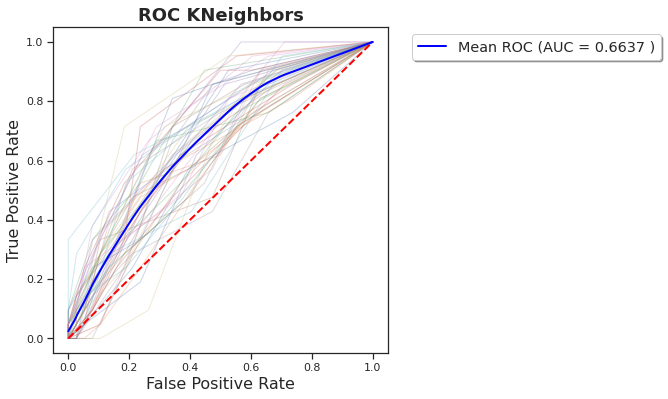

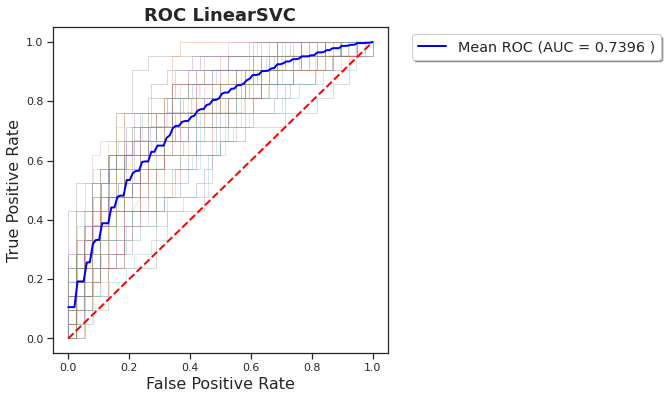

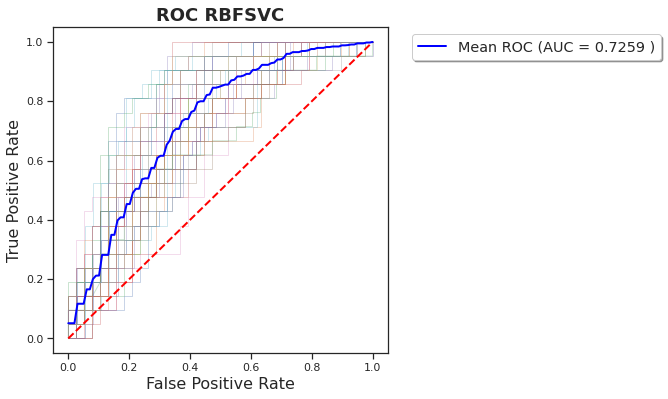

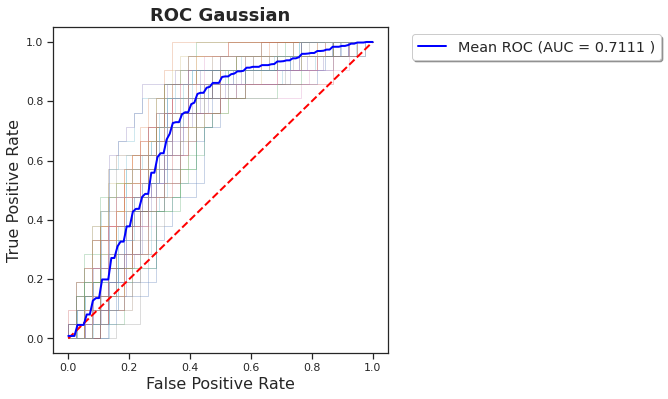

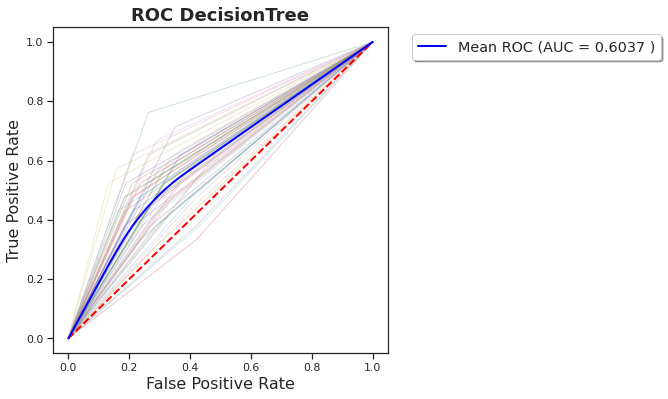

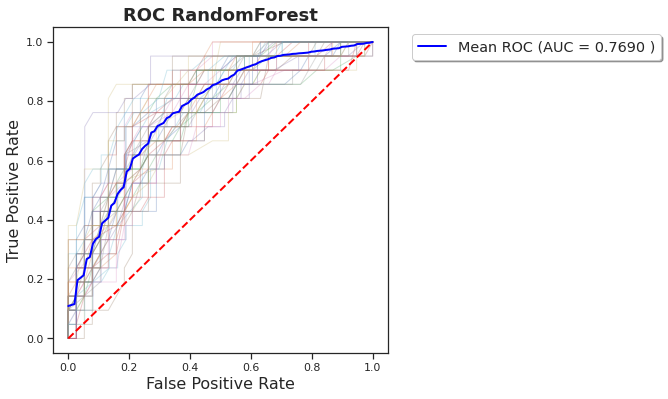

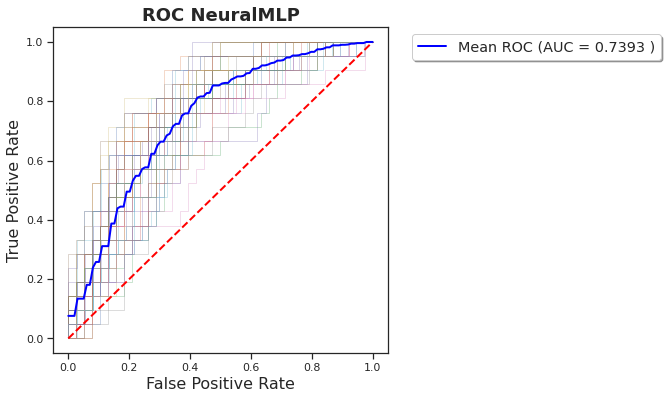

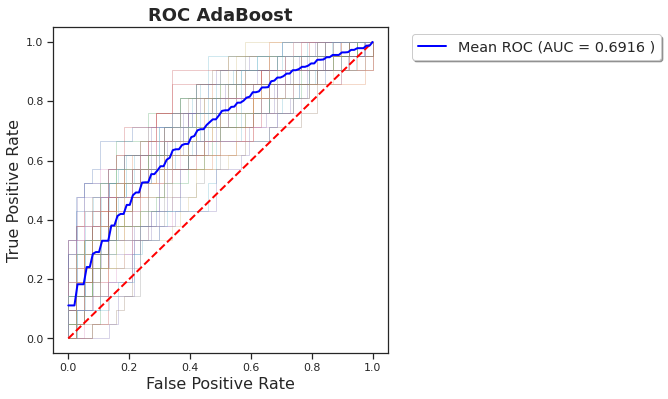

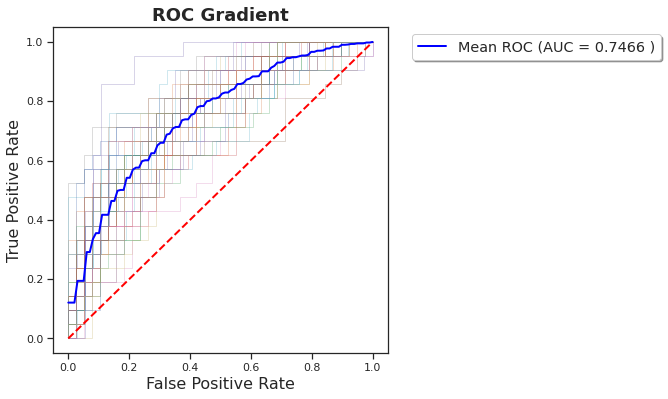

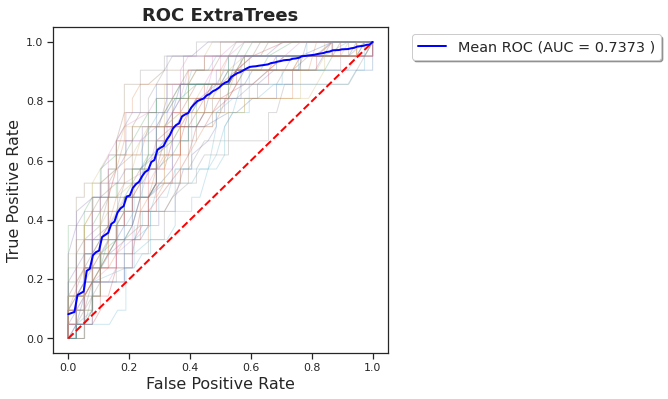

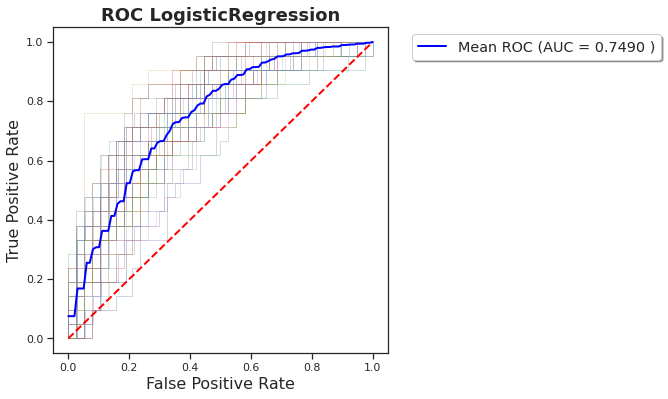

In [ ]:
media_auc_padrao = plotar_media_curva_roc(names, classes, dados, 5, 2)

##Testando Hiperparâmetros

Agora que temos um conjunto de modelos vamos trabalhar com os hiperparâmetros e o RandomizedSearchCV para melhorar o ajuste desses modelos.

A execução desse processo é encontrado no notebook [projeto_final_hiperparametros.ipynb](https://github.com/hc0rd31r0/Bootcamp_Data_Science/blob/main/projeto-final/projeto_final_hiperparametros.ipynb) que foi separado devido ao tempo do processamento. Abaixo temos os modelos configurados com os melhores parâmetros encontrados.

```
dfmodelosRand = executa_modelos_RandomizedSearchCV(names, classes, dados, 5, 10, hiperparams, 15)

Modelo: KNeighbors      tempo: 7 segundos
Modelo: LinearSVC       tempo: 14 segundos
Modelo: RBFSVC          tempo: 17 segundos
Modelo: Gaussian        tempo: 58 segundos
Modelo: DecisionTree    tempo: 5 segundos
Modelo: RandomForest    tempo: 195 segundos
Modelo: NeuralMLP       tempo: 338 segundos
Modelo: AdaBoost        tempo: 203 segundos
Modelo: Gradient        tempo: 337 segundos
Modelo: ExtraTrees      tempo: 235 segundos
Modelo: LogisticRegression 	 tempo: 55 segundos
```

Valores médios do Processamento. Ordenado por AUC.

```
Nome                  AUC         Train AUC   Std AUC    Tempo
--------------------------------------------------------------
RandomForest          0.785994    0.909343    0.059556    195
Gradient              0.752666    0.997117    0.064610    337
LogisticRegression    0.751311    0.844124    0.058534    55
NeuralMLP             0.748788    0.812865    0.058607    338
ExtraTrees            0.745225    0.818170    0.066434    235
LinearSVC             0.737272    0.849511    0.062095    14
DecisionTree          0.731548    0.842706    0.059752    5
RBFSVC                0.723447    0.776156    0.062797    17
Gaussian              0.716824    0.950327    0.069887    58
AdaBoost              0.716593    0.940915    0.056281    203
KNeighbors            0.701419    1.000000    0.063808    7
--------------------------------------------------------------

```

In [ ]:
classes2 = [
    KNeighborsClassifier(leaf_size=46, metric='minkowski',
        n_neighbors=17, weights='distance'),

    SVC(C=1, gamma='auto', probability=True),

    SVC(C=1, gamma='scale', probability=True),

    GaussianProcessClassifier(max_iter_predict=296, n_restarts_optimizer=0,
        warm_start=False),

    DecisionTreeClassifier(criterion='gini',max_depth=8,
        min_samples_leaf=9, min_samples_split=62),

    RandomForestClassifier(bootstrap=True, criterion='gini',
        max_depth=67, min_samples_leaf=9, min_samples_split=46,
        n_estimators=85, warm_start=False),

    MLPClassifier(activation='logistic', shuffle=True,
        solver='adam', warm_start=True),

    AdaBoostClassifier(algorithm='SAMME', n_estimators=33),

    GradientBoostingClassifier(max_depth=2, min_samples_leaf=7,
        min_samples_split=10, n_estimators=100,
        warm_start=False),

    ExtraTreesClassifier(bootstrap=False, criterion='entropy',
        max_depth=7, min_samples_leaf=13,
        min_samples_split=102, n_estimators=188,
        warm_start=True),

  LogisticRegression(max_iter=4947, solver='lbfgs', warm_start=False)

]

###**Curvas ROC AUC com os valores ajustados**

Vamos verificar se houve alguma alteração nos vamos valores médios.

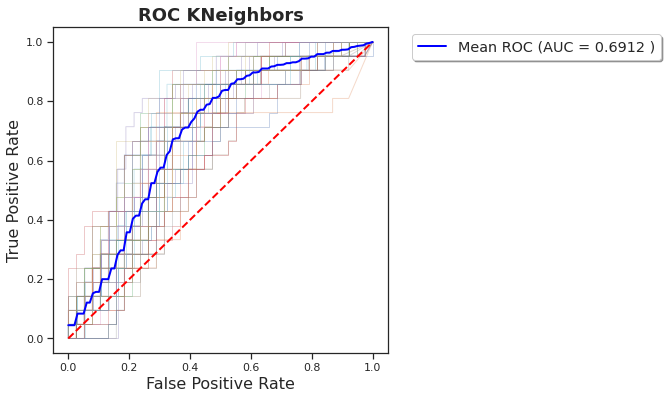

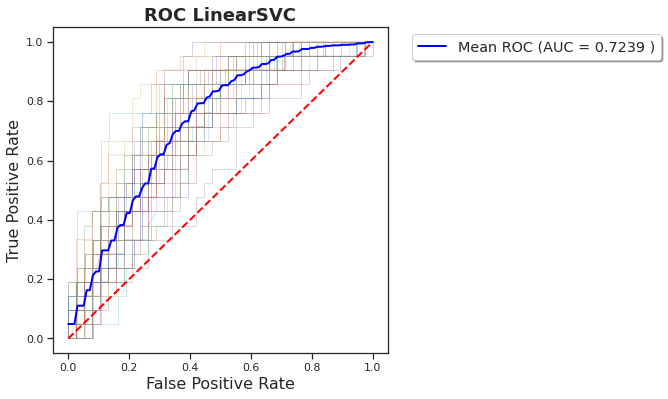

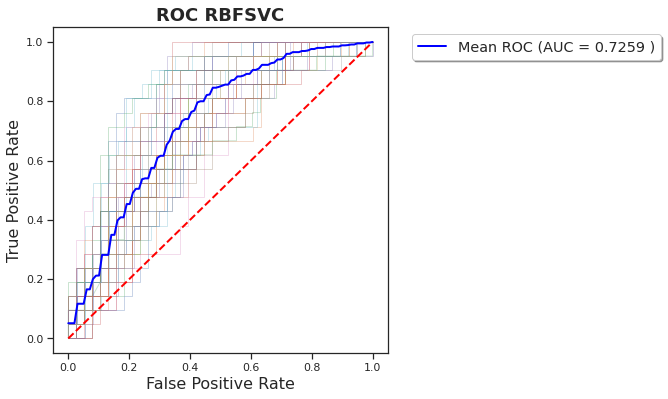

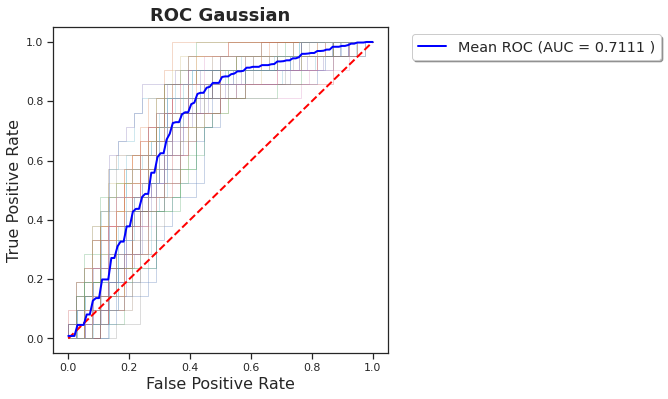

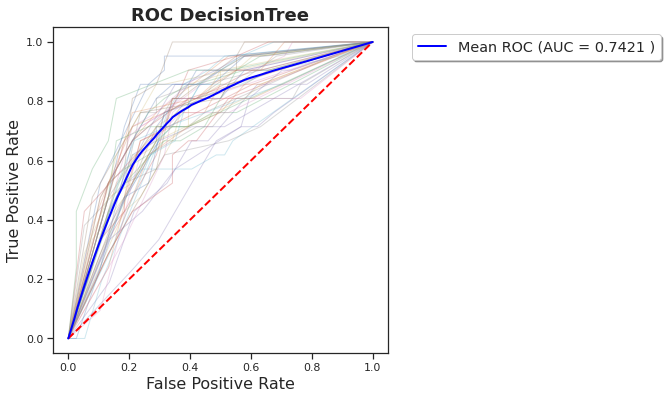

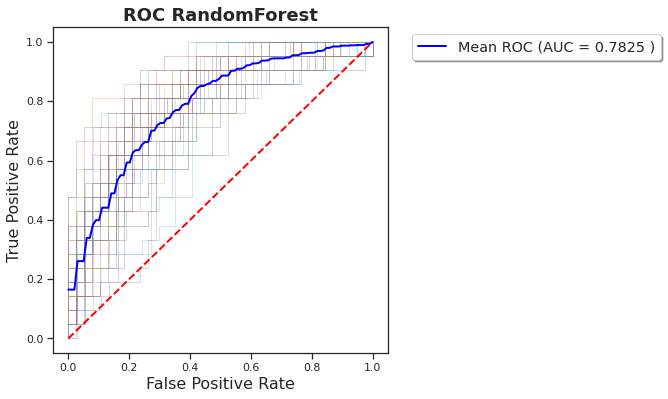

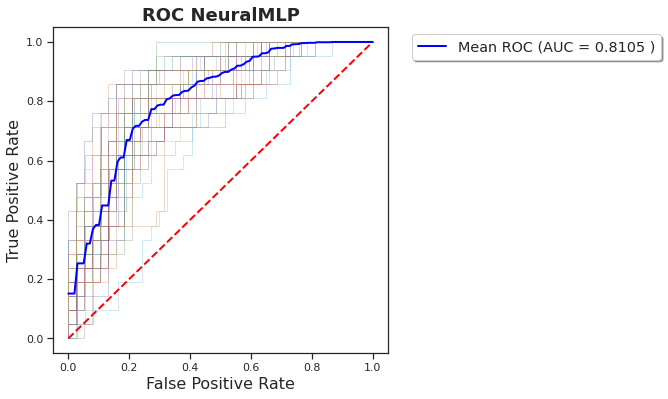

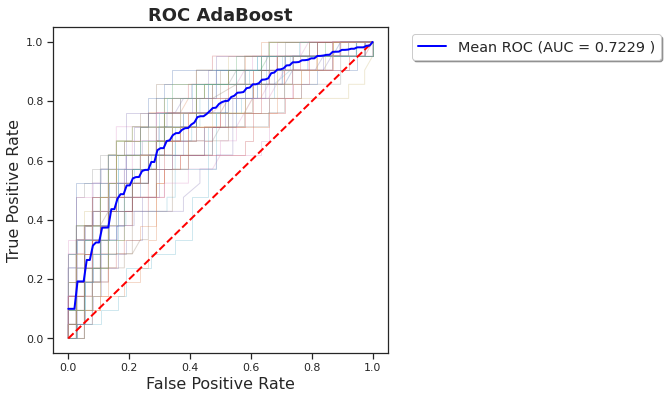

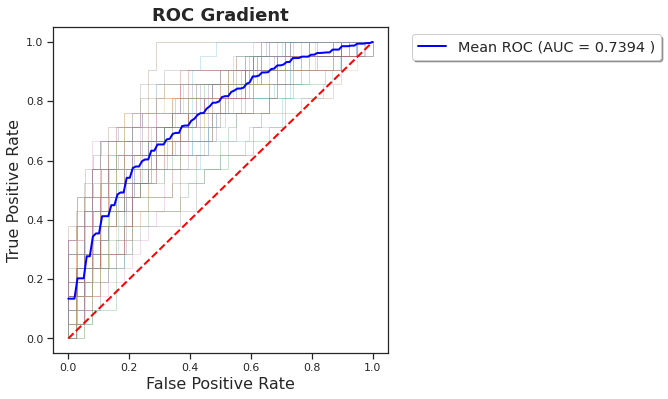

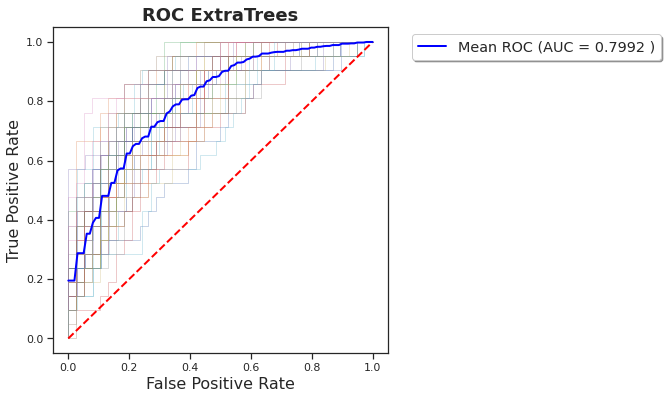

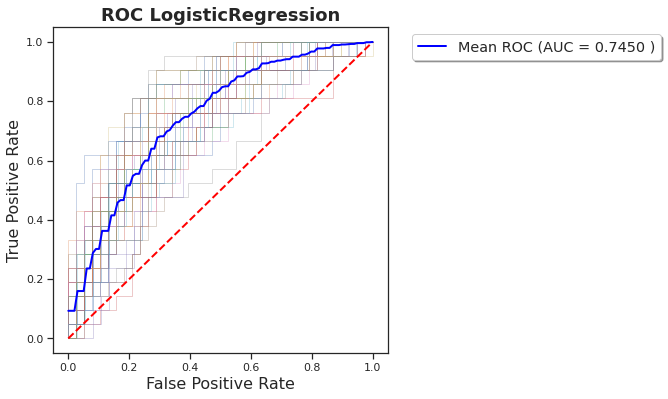

In [ ]:
media_auc_hiper = plotar_media_curva_roc(names, classes2, dados, 5, 2)

In [ ]:
display(media_auc_padrao)
print('')
display(media_auc_hiper)

[['KNeighbors', 0.6637226813361642],
 ['LinearSVC', 0.7396217587126677],
 ['RBFSVC', 0.725910184092002],
 ['Gaussian', 0.7111255411255408],
 ['DecisionTree', 0.6037480412613451],
 ['RandomForest', 0.7690406000035629],
 ['NeuralMLP', 0.7393265993265992],
 ['AdaBoost', 0.6916161616161616],
 ['Gradient', 0.7466137566137565],
 ['ExtraTrees', 0.7373238882329791],
 ['LogisticRegression', 0.7489995189995189]]

[['KNeighbors', 0.6911916341545968],
 ['LinearSVC', 0.7238719567002394],
 ['RBFSVC', 0.725910184092002],
 ['Gaussian', 0.7111255411255408],
 ['DecisionTree', 0.742063484326507],
 ['RandomForest', 0.7824963924963921],
 ['NeuralMLP', 0.8104906204906204],
 ['AdaBoost', 0.7228795247650466],
 ['Gradient', 0.7394083694083693],
 ['ExtraTrees', 0.799187109187109],
 ['LogisticRegression', 0.7449831649831649]]

#Matriz de confusão

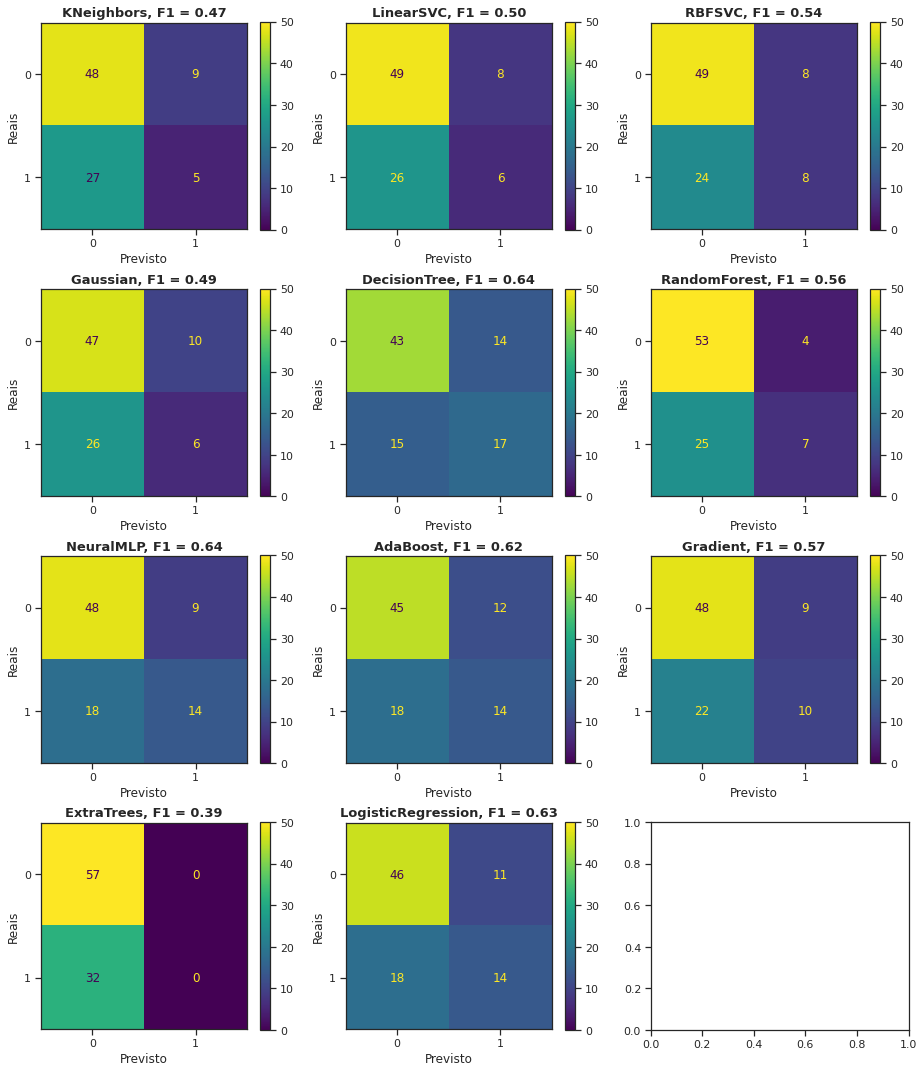

In [ ]:
retorno = plotar_matrix_confusao_modelos(names, classes2, dados, 4, 3)

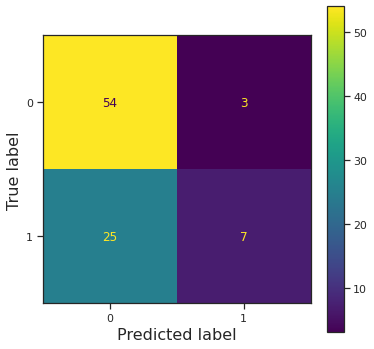

In [ ]:
 # Destacar o mellhor modelo
plotar_matrix_confusao(classes2[n_RandomForest], dados)

#Classification Report

In [ ]:
dffinal = montar_classificacao(names, classes2, dados)

In [ ]:
dffinal.T

0        1 accuracy macro avg weighted avg
KNeighbors         precision 0.648649 0.400000           0.524324     0.559247
                   recall    0.842105 0.187500           0.514803     0.606742
                   f1-score  0.732824 0.255319 0.606742  0.494072     0.561137
                   support         57       32       89        89           89
LinearSVC          precision 0.675676 0.533333           0.604505     0.624496
                   recall    0.877193 0.250000           0.563596     0.651685
                   f1-score  0.763359 0.340426 0.651685  0.551892     0.611293
                   support         57       32       89        89           89
RBFSVC             precision 0.675676 0.533333           0.604505     0.624496
                   recall    0.877193 0.250000           0.563596     0.651685
                   f1-score  0.763359 0.340426 0.651685  0.551892     0.611293
                   support         57       32       89        89           89
Gaussian           precision 0.656716 0.409091           0.532904     0.567683
                   recall    0.771930 0.281250           0.526590     0.595506
                   f1-score  0.709677 0.333333 0.595506  0.521505     0.574363
                   support         57       32       89        89           89
DecisionTree       precision 0.695652 0.550000           0.622826     0.643283
                   recall    0.842105 0.343750           0.592928     0.662921
                   f1-score  0.761905 0.423077 0.662921  0.592491     0.640079
                   support         57       32       89        89           89
RandomForest       precision 0.718310 0.666667           0.692488     0.699742
                   recall    0.894737 0.375000           0.634868     0.707865
                   f1-score  0.796875 0.480000 0.707865  0.638437     0.682942
                   support         57       32       89        89           89
NeuralMLP          precision 0.746269 0.681818           0.714043     0.723095
                   recall    0.877193 0.468750           0.672971     0.730337
                   f1-score  0.806452 0.555556 0.730337  0.681004     0.716242
                   support         57       32       89        89           89
AdaBoost           precision 0.696429 0.454545           0.575487     0.609459
                   recall    0.684211 0.468750           0.576480     0.606742
                   f1-score  0.690265 0.461538 0.606742  0.575902     0.608027
                   support         57       32       89        89           89
Gradient           precision 0.779661 0.633333           0.706497     0.727049
                   recall    0.807018 0.593750           0.700384     0.730337
                   f1-score  0.793103 0.612903 0.730337  0.703003     0.728312
                   support         57       32       89        89           89
ExtraTrees         precision 0.647727 1.000000           0.823864     0.774387
                   recall    1.000000 0.031250           0.515625     0.651685
                   f1-score  0.786207 0.060606 0.651685  0.423406     0.525317
                   support         57       32       89        89           89
LogisticRegression precision 0.754098 0.607143           0.680621     0.701260
                   recall    0.807018 0.531250           0.669134     0.707865
                   f1-score  0.779661 0.566667 0.707865  0.673164     0.703079
                   support         57       32       89        89           89

#Modelo Selecionado

Parece que o GradientBoostingClassifier está se saindo muito bem, mas temos que ver se não temos overfit aqui.

In [ ]:
# Melhor Modelo
# modelo = classes2[n_RandomForest]
modelo = classes2[n_RandomForest]

In [ ]:
roda_n_modelos(modelo, dados, 50)

AUC médio 0.7820352564102565
Intervalo 0.6847811401755742 - 0.8792893726449388


(0.7820352564102565, 0.048627058117341124)

In [ ]:
def roda_n_modelos_com_roc_curve(model, dados, n):
  """
  Essa função diminui os efeitos da aleatoriedade do train_test_split, veja roda_modelo(), 
  fazendo uma média da execução de n vezes do model sobre os dados.

  Retorna: auc_medio, auc_std
  """

  x_columns = dados.columns
  y = dados['ICU']
  x = dados[x_columns].drop(["ICU"], axis=1)

  auc_lista = []

  for _ in range(n):
      x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

      model.fit(x_train, y_train)
      prob_predic = model.predict_proba(x_test)
      auc = roc_auc_score(y_test, prob_predic[:,1])
      auc_lista.append(auc)
      metrics.plot_roc_curve(model, x_test, y_test) 

  auc_medio = np.mean(auc_lista)
  auc_std = np.std(auc_lista)
  print(f"AUC médio {auc_medio}")
  print(f"Intervalo {auc_medio - 2* auc_std} - {auc_medio + 2* auc_std}")
  plt.show()


In [ ]:
roda_n_modelos_com_roc_curve( modelo, dados, 50)

In [ ]:
executa_modelos(['Gradient'], [modelo], dados, 5, 10)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

def roda_modelo_cv_original(modelo, dados, n_splits, n_repeats):

  np.random.seed(1231234)
  dados = dados.sample(frac=1).reset_index(drop=True)
  x_columns = dados.columns
  y = dados['ICU']
  x = dados[x_columns].drop(["ICU"], axis=1)

  cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
  resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score'])

  print(f"AUC {auc_medio} - {auc_medio_treino}")

  # auc_std = np.std(resultados['test_score'])
  # print(f"AUC Médio {auc_medio} Intervalo {auc_medio - (2*auc_std)} - {auc_medio + (2*auc_std)}")

  return auc_medio, auc_medio_treino

In [ ]:
teste_lista = []
treino_lista = []
for i in range(1,15):
    modelo_teste = RandomForestClassifier(bootstrap=True, criterion='gini',
        max_depth=i, min_samples_leaf=9, min_samples_split=46,
        n_estimators=85, warm_start=False)
    teste, treino = roda_modelo_cv_original(modelo_teste, dados, 5, 10)
    teste_lista.append(teste)
    treino_lista.append(treino)

AUC 0.7608863374652849 - 0.8575552083852014
AUC 0.771471245681772 - 0.8775136205580176
AUC 0.7750145634356161 - 0.890980721671729
AUC 0.7788085077558761 - 0.8995721816959619
AUC 0.7786960644855384 - 0.9052886977377219
AUC 0.778793605635711 - 0.9080421874221978
AUC 0.7791756418072208 - 0.9088012041693639
AUC 0.7790530380004064 - 0.9090073590433038
AUC 0.7790537153695049 - 0.9090184069445136
AUC 0.7790537153695049 - 0.9090168405284735
AUC 0.7790537153695049 - 0.9090168405284735
AUC 0.7790537153695049 - 0.9090168405284735
AUC 0.7790537153695049 - 0.9090168405284735
AUC 0.7790537153695049 - 0.9090168405284735


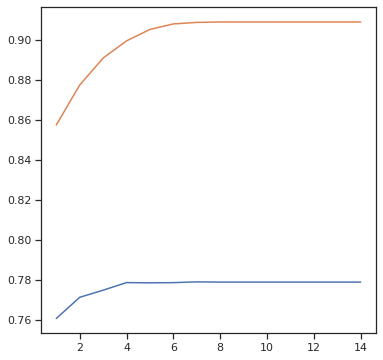

In [ ]:
x = range(1,15)
plt.plot(x, teste_lista)
plt.plot(x, treino_lista)

# Salvando nosso modelo

[pickle](https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>


In [ ]:
import pickle

In [ ]:
x_columns = dados.columns
y = dados['ICU']
x = dados[x_columns].drop(["ICU"], axis=1)

modelo.fit(x,y)

output = open('/content/modelo_hsl', 'wb')
pickle.dump(modelo, output)
output.close()

# Conclusão

---

Após analisar vários modelos de Machine Learning, ajustando Hiperparâmetros, visualizando a curva ROC, Matriz de confusão, Classification Report cheguei a conclusão que o melhor modelo é o XPTO.


## Referências

* [Hospital Sírio-Libanês](https://www.hospitalsiriolibanes.org.br/Paginas/nova-home.aspx)
* [Kaggle - COVID-19 - Clinical Data to assess diagnosis - Sírio Libanês](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19)
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [SciKit Learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Os Três Tipos de Aprendizado de Máquina](https://lamfo-unb.github.io/2017/07/27/tres-tipos-am/)
* [Enriched Lightgbm | PR 86% - notebook](https://www.kaggle.com/andrewmvd/enriched-lightgbm-pr-86-auc-92-68)
* [PedroHCAlmeida - notebook](https://github.com/PedroHCAlmeida/Bootcamp_alura/blob/main/Modulo_4/Aulas/Aulas.ipynb)
* [willianrocha (notebook)](https://github.com/willianrocha/COVID-19_clinical_data_assess_diagnosis/blob/main/notebooks/ML.ipynb)
* [Configurar o treinamento do AutoML com Python](https://docs.microsoft.com/pt-br/azure/machine-learning/how-to-configure-auto-train)
* [Avaliando os resultados do experimento de machine learning automatizado](https://docs.microsoft.com/pt-br/azure/machine-learning/how-to-understand-automated-ml)
* [Matriz de Confusão e AUC ROC](https://medium.com/data-hackers/matriz-de-confus%C3%A3o-e-auc-roc-f7e446dca107)
* [SciKit Learn - 3.3. Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
* [SciKit Learn - Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


